In [1]:
from sklearn.datasets import load_digits
import pandas as pd

In [2]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

# Find Best Parameter Automaticly

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier()

In [8]:
param = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]
}

In [9]:
clf = GridSearchCV(knn,param,cv=5,return_train_score=False)

In [10]:
clf.fit(digits.data,digits.target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [12]:
clf.best_params_

{'n_neighbors': 2}

# Find Best parameter manually

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3,random_state=10)

In [28]:
len(x_train)

1257

In [36]:
km = KNeighborsClassifier(n_neighbors = 2)
km.fit(x_train, y_train)
km.score(x_test, y_test)

0.987037037037037

In [30]:
km = KNeighborsClassifier(n_neighbors = 5)
km.fit(x_train, y_train)
km.score(x_test, y_test)

0.987037037037037

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [32]:
cm = confusion_matrix(y_test, km.predict(x_test))

<AxesSubplot:>

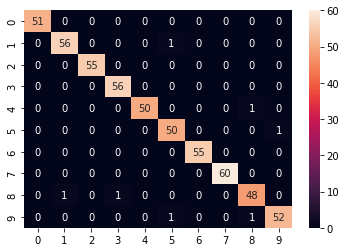

In [33]:
sn.heatmap(cm,annot=True)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,km.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       1.00      0.98      0.99        51
           5       0.96      0.98      0.97        51
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        60
           8       0.96      0.96      0.96        50
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

